In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [23]:
calories = pd.read_csv('C:/Users/SilentMuzinde/Downloads/ML and AI/Calories Burnt/calories.csv')

In [20]:
exercise = pd.read_csv('C:/Users/SilentMuzinde/Downloads/ML and AI/Calories Burnt/exercise.csv')

In [24]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [25]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [29]:
df =  pd.merge(calories, exercise, on ='User_ID')
df.shape

(15000, 9)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [32]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5


In [37]:
df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [39]:
df.duplicated().sum()

0

Data Visualisation

<Axes: xlabel='count', ylabel='Gender'>

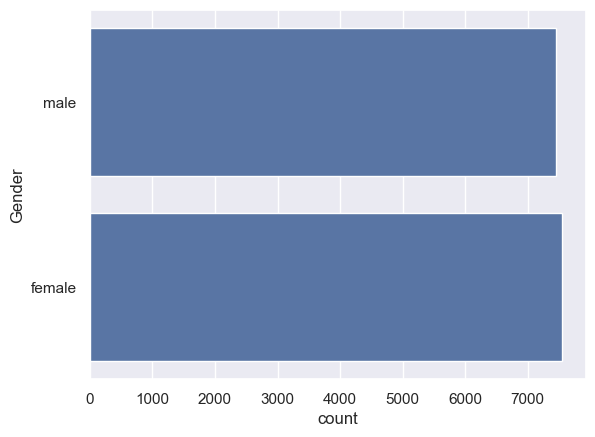

In [40]:
sns.set()
sns.countplot(df['Gender'])

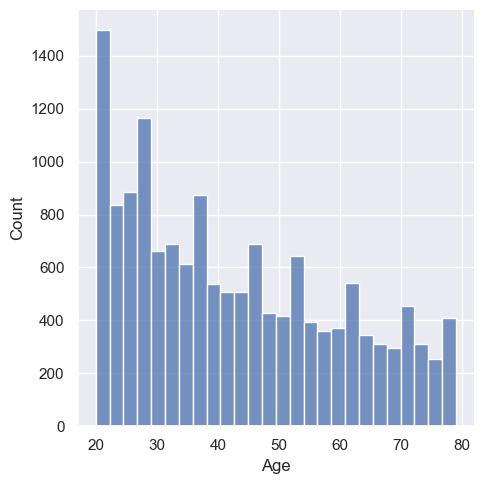

In [41]:
sns.displot(df['Age'])

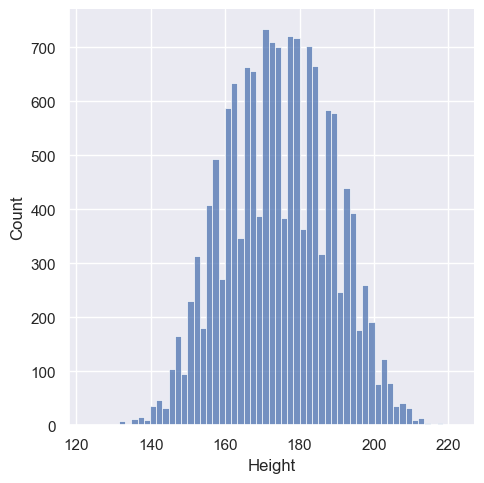

In [42]:
sns.displot(df['Height'])

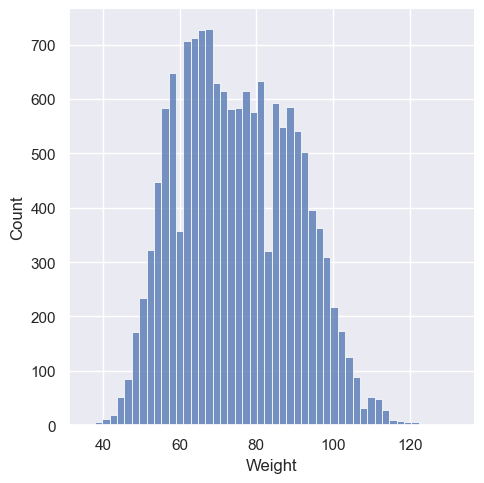

In [43]:
sns.displot(df['Weight'])

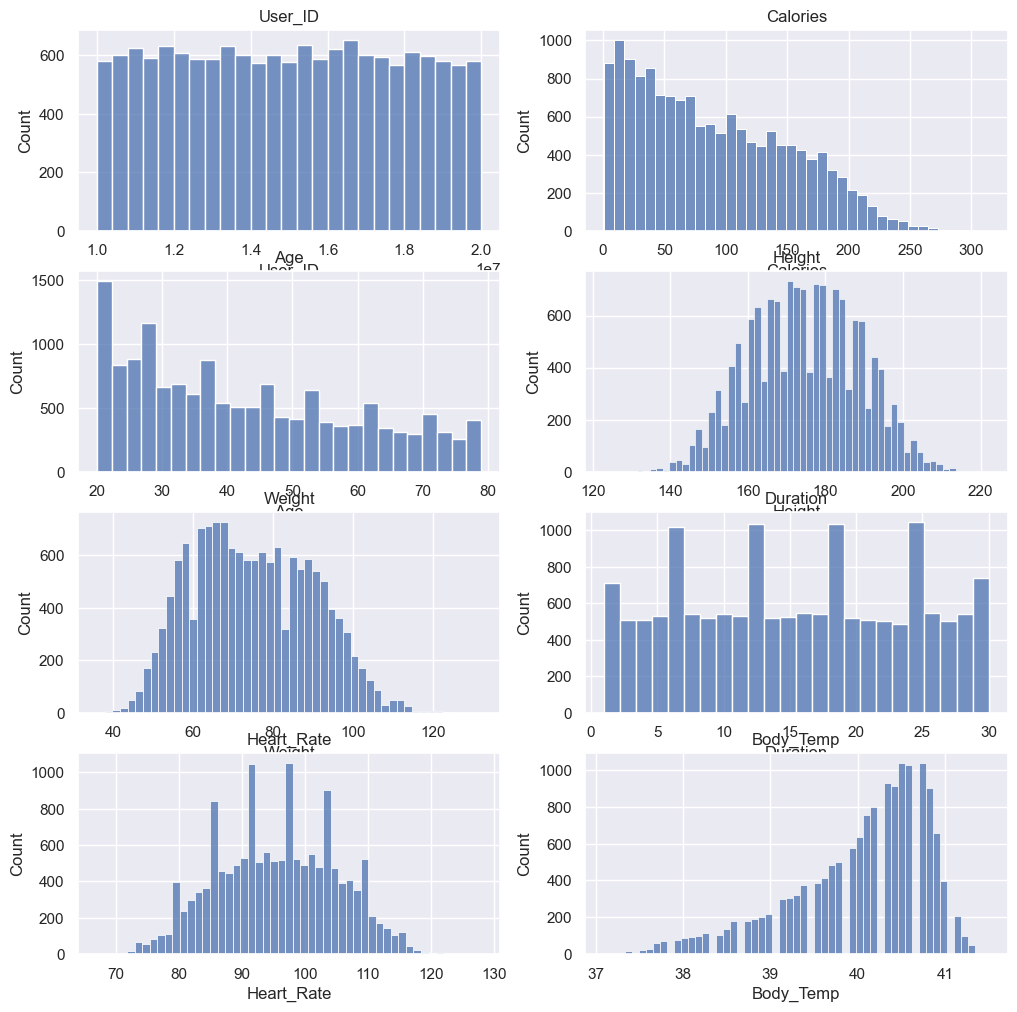

In [61]:

numeric_cols = df.select_dtypes(include='number').columns
num_cols = len(numeric_cols)

fig, axes = plt.subplots(4, 2, figsize=(12, 12)) # Adjust figure size as needed

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the numeric columns and create histograms
for i, col in enumerate(numeric_cols):
    if i < num_rows * num_cols:  # Only plot if there's a subplot available
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)
    else:
        break  # Stop if we run out of subplots

# Adjust layout and display the plot
# plt.tight_layout()
plt.show()

In [70]:
co= df[numeric_cols].corr()

<Axes: >

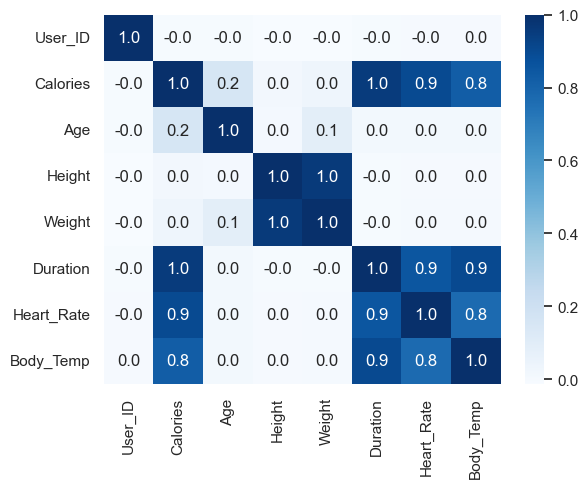

In [75]:
sns.heatmap(co, annot=True,fmt='1.1f', cmap='Blues')

In [81]:
X = df.drop(columns=['User_ID', 'Calories'])

In [87]:
Y = df['Calories']

In [84]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [94]:
from sklearn.preprocessing import OrdinalEncoder

preprocessor= ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), [ 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])
    
],  remainder='passthrough')

In [98]:
pipeline= Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor()) ]
)

In [114]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [102]:
y_pred= pipeline.predict(X_test)
r2_score(y_test, y_pred)


0.9988678909361673

In [104]:
mean_absolute_error(y_test, y_pred)

1.4981198125282924

In [109]:
mean_absolute_percentage_error(y_test, y_pred)*100

2.670262050802991

In [112]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross= cross_val_score(pipeline, X,Y, cv=kfold, scoring= 'r2')
cross.mean()

0.9988510864545181

#Saving the Model

In [116]:
with open('pipeline model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)